### 성적데이터 생성

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame(
    {'시간' : [2, 4, 8 ,9],
    '성적' : [20, 40, 80, 90]}
)
data

,시간,성적
0,2,20
1,4,40
2,8,80
3,9,90


### w와 b를 찾는 방법
- 최소제곱법 : 수학적 공식을 이용한 해석적 방법
- 경사하강법 : w와 b값의 변화에 따른 오차(loss)값의 기울기를 이용하여 찾는 방법



1. 최소제곱법이 적용된 sklearn 모델 사용하기


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
# 모델 초기화(생성)
lr_rg = LinearRegression() # 우리가 조정해줄 하이퍼파라미터가 없음!

In [5]:
# 학습
lr_rg.fit(data[['시간']], data[['성적']]) # 문제데이터, 정답데이터
            # 특성은 기본적으로 여러개


LinearRegression()

In [6]:
# 예측
lr_rg.predict([[7]])

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[70.]])

In [8]:
# 가중치(w), 절편(b) 확인하기
print(f'가중치 :{lr_rg.coef_}') # 가중치
print(f'절편은 :{lr_rg.intercept_}') # 절편

가중치 :[[10.]]
절편은 :[0.]


### 경사하강법 (Gradient Descent)
1. 파라미터(w,b)임의의 값으로 초기화
2. 예측 : 현재 w와 b값을 사용해서 예측을 수행
3. 오차 계산 : 예측값과 실제값 사이의 오차를 계산(MSE)
4. 기울기 계산
5. 파라미터 업데이트 : 학습률을 사용해서 w,b 값을 업데이트

In [9]:
# 가설함수 정의
# 예측값
def h(w, x):
    return w * x + 0

In [11]:
# MSE(평균제곱오차) : 손실함수, 비용함수
def cost(data, target, weight): # 입력특성(시간), 실제값(실제성적), 가중치
    y_pred = h(weight, data) # 가설함수를 사용해서 예측값 구하기
    mse = ((target - y_pred)**2).mean()
    return mse

In [15]:
# MSE
cost(data['시간'],data['성적'], 10)

np.float64(0.0)

- w값에 따른 mse 변화율 그려보기

In [16]:
# x 축의 범위
w_arr = range(-10, 30) # -10 ~ 30

In [17]:
cost_list = [] # 비용함수를 담아줄 리스트 (mse)
for w in w_arr:
    c = cost(data['시간'],data['성적'], w)
    cost_list.append(c)

In [19]:
cost_list

[np.float64(16500.0),
 np.float64(14891.25),
 np.float64(13365.0),
 np.float64(11921.25),
 np.float64(10560.0),
 np.float64(9281.25),
 np.float64(8085.0),
 np.float64(6971.25),
 np.float64(5940.0),
 np.float64(4991.25),
 np.float64(4125.0),
 np.float64(3341.25),
 np.float64(2640.0),
 np.float64(2021.25),
 np.float64(1485.0),
 np.float64(1031.25),
 np.float64(660.0),
 np.float64(371.25),
 np.float64(165.0),
 np.float64(41.25),
 np.float64(0.0),
 np.float64(41.25),
 np.float64(165.0),
 np.float64(371.25),
 np.float64(660.0),
 np.float64(1031.25),
 np.float64(1485.0),
 np.float64(2021.25),
 np.float64(2640.0),
 np.float64(3341.25),
 np.float64(4125.0),
 np.float64(4991.25),
 np.float64(5940.0),
 np.float64(6971.25),
 np.float64(8085.0),
 np.float64(9281.25),
 np.float64(10560.0),
 np.float64(11921.25),
 np.float64(13365.0),
 np.float64(14891.25)]

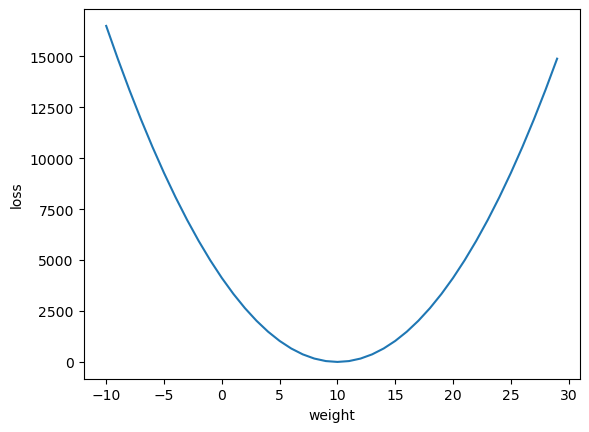

In [21]:
plt.plot(w_arr, cost_list)
plt.xlabel('weight')
plt.ylabel('loss') # cost. mse
plt.show()

In [22]:
# 모델 사용해보기
from sklearn.linear_model import SGDRegressor

In [23]:
# 모델 초기화
sgd_rg = SGDRegressor(
    eta0 = 0.01, # 학습률 (기울기의 보폭)
    max_iter = 5000, # w값 업데이트 횟수 지정
    verbose = 1 # 학습 진행 현황 출력 여부
)

In [24]:
# 모델 학습
sgd_rg.fit(data[['시간']],data['성적'])

-- Epoch 1
Norm: 8.57, NNZs: 1, Bias: 1.201328, T: 4, Avg. loss: 960.491259
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.51, NNZs: 1, Bias: 1.312477, T: 8, Avg. loss: 19.642379
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.73, NNZs: 1, Bias: 1.338419, T: 12, Avg. loss: 1.326610
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.79, NNZs: 1, Bias: 1.340586, T: 16, Avg. loss: 0.307068
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.80, NNZs: 1, Bias: 1.337179, T: 20, Avg. loss: 0.210517
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.82, NNZs: 1, Bias: 1.334573, T: 24, Avg. loss: 0.192271
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.82, NNZs: 1, Bias: 1.329761, T: 28, Avg. loss: 0.188824
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.81, NNZs: 1, Bias: 1.324706, T: 32, Avg. loss: 0.185229
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.82, NNZs: 1, Bias: 1.321429, T: 36, Avg. loss: 0.183939
Total training time: 0.00 seconds.
-- Epoch 

SGDRegressor(max_iter=5000, verbose=1)

In [25]:
# 가중치와 절편 확인
sgd_rg.coef_, sgd_rg.intercept_

(array([9.84394196]), array([1.13283624]))

In [27]:
# 성능 확인
sgd_rg.score(data[['시간']],data['성적'])
# 회귀 평가 지표(오차값, 데이터의 분포를 잘 이해하고 있는가)와 분류 평가 지표(얼마나 잘 맞췄는가?)는 다름
# r^2 score : 0~1사이의 값, 1에 가까울수록 회귀직선이 데이터의 분포를 잘 이해하고 있다.

0.9996887197249925